# Guía práctica para aprender Pandas con DataFrame manual
Este notebook te ayudará a entender las operaciones básicas con `pandas`, usando un ejemplo creado a partir de un diccionario.

## 1. Inspección inicial del DataFrame

In [42]:
import pandas as pd

# Crear un DataFrame a partir de un diccionario
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Lucía', 'Marta', 'Jorge', 'Sofía'],
    'Edad': [23, 35, 45, 25, 30, 28, 32],
    'Ciudad': ['CDMX', 'Guadalajara', 'Monterrey', 'CDMX', 'Puebla', 'CDMX', 'Guadalajara'],
    'Salario': [12000, 15000, 18000, 12500, 14000, 13000, 15500],
    'Departamento': ['Ventas', 'Marketing', 'Ventas', 'TI', 'TI', 'Marketing', 'Ventas']
}

df = pd.DataFrame(data)
df.head()

,Nombre,Edad,Ciudad,Salario,Departamento
0,Ana,23,CDMX,12000,Ventas
1,Luis,35,Guadalajara,15000,Marketing
2,Carlos,45,Monterrey,18000,Ventas
3,Lucía,25,CDMX,12500,TI
4,Marta,30,Puebla,14000,TI


## 2. Estructura y resumen del DataFrame

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Nombre        7 non-null      object
 1   Edad          7 non-null      int64 
 2   Ciudad        7 non-null      object
 3   Salario       7 non-null      int64 
 4   Departamento  7 non-null      object
dtypes: int64(2), object(3)
memory usage: 412.0+ bytes


In [44]:
df.describe()

,Edad,Salario
count,7.000000,7.000000
mean,31.142857,14285.714286
std,7.335498,2078.804602
min,23.000000,12000.000000
25%,26.500000,12750.000000
50%,30.000000,14000.000000
75%,33.500000,15250.000000
max,45.000000,18000.000000


## 3. Selección de columnas y filas

In [45]:
df['Edad']  # Serie

0    23
1    35
2    45
3    25
4    30
5    28
6    32
Name: Edad, dtype: int64

In [46]:
df[['Edad']]  # DataFrame

,Edad
0,23
1,35
2,45
3,25
4,30
5,28
6,32


In [47]:
df[['Nombre', 'Salario']]

,Nombre,Salario
0,Ana,12000
1,Luis,15000
2,Carlos,18000
3,Lucía,12500
4,Marta,14000
5,Jorge,13000
6,Sofía,15500


## 4. Filtrado de filas

In [48]:
df[df['Ciudad'] == 'CDMX']

,Nombre,Edad,Ciudad,Salario,Departamento
0,Ana,23,CDMX,12000,Ventas
3,Lucía,25,CDMX,12500,TI
5,Jorge,28,CDMX,13000,Marketing


In [49]:
df[(df['Ciudad'] == 'CDMX') & (df['Departamento'] == 'TI')]

,Nombre,Edad,Ciudad,Salario,Departamento
3,Lucía,25,CDMX,12500,TI


## 5. Ordenar filas por salario

In [50]:
df.sort_values(by='Salario', ascending=False)

,Nombre,Edad,Ciudad,Salario,Departamento
2,Carlos,45,Monterrey,18000,Ventas
6,Sofía,32,Guadalajara,15500,Ventas
1,Luis,35,Guadalajara,15000,Marketing
4,Marta,30,Puebla,14000,TI
5,Jorge,28,CDMX,13000,Marketing
3,Lucía,25,CDMX,12500,TI
0,Ana,23,CDMX,12000,Ventas


## 6. Crear nuevas columnas

In [51]:
df['SalarioAnual'] = df['Salario'] * 12
df.head()

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
0,Ana,23,CDMX,12000,Ventas,144000
1,Luis,35,Guadalajara,15000,Marketing,180000
2,Carlos,45,Monterrey,18000,Ventas,216000
3,Lucía,25,CDMX,12500,TI,150000
4,Marta,30,Puebla,14000,TI,168000


## 7. Conversión de tipos de datos

In [52]:
df['Edad'] = df['Edad'].astype(float)
df.dtypes

Nombre           object
Edad            float64
Ciudad           object
Salario           int64
Departamento     object
SalarioAnual      int64
dtype: object

## 8. Filtrado avanzado

In [53]:
df[(df['Edad'] >= 25) & (df['Edad'] <= 35)]

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
1,Luis,35.0,Guadalajara,15000,Marketing,180000
3,Lucía,25.0,CDMX,12500,TI,150000
4,Marta,30.0,Puebla,14000,TI,168000
5,Jorge,28.0,CDMX,13000,Marketing,156000
6,Sofía,32.0,Guadalajara,15500,Ventas,186000


In [54]:
df[df['Ciudad'].isin(['CDMX', 'Guadalajara'])]

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
0,Ana,23.0,CDMX,12000,Ventas,144000
1,Luis,35.0,Guadalajara,15000,Marketing,180000
3,Lucía,25.0,CDMX,12500,TI,150000
5,Jorge,28.0,CDMX,13000,Marketing,156000
6,Sofía,32.0,Guadalajara,15500,Ventas,186000


In [55]:
df[df['Nombre'].str.startswith('L')]

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
1,Luis,35.0,Guadalajara,15000,Marketing,180000
3,Lucía,25.0,CDMX,12500,TI,150000


## 9. Agrupaciones

In [56]:
df.groupby('Departamento')['Salario'].mean()

Departamento
Marketing    14000.000000
TI           13250.000000
Ventas       15166.666667
Name: Salario, dtype: float64

## 10. Eliminación de duplicados

In [57]:
df = pd.concat([df, df.iloc[[0]]])
df = df.drop_duplicates()
df.head()

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
0,Ana,23.0,CDMX,12000,Ventas,144000
1,Luis,35.0,Guadalajara,15000,Marketing,180000
2,Carlos,45.0,Monterrey,18000,Ventas,216000
3,Lucía,25.0,CDMX,12500,TI,150000
4,Marta,30.0,Puebla,14000,TI,168000


## 11. Tablas dinámicas (Pivot Table)

In [58]:
df.pivot_table(values='Salario', index='Ciudad', columns='Departamento', aggfunc='mean', fill_value=0)

Departamento,Marketing,TI,Ventas
Ciudad,,,
CDMX,13000.0,12500.0,12000.0
Guadalajara,15000.0,0.0,15500.0
Monterrey,0.0,0.0,18000.0
Puebla,0.0,14000.0,0.0


## 12. Indexación con loc e iloc

In [59]:
df.loc[0:2, ['Nombre', 'Salario']]

,Nombre,Salario
0,Ana,12000
1,Luis,15000
2,Carlos,18000


In [60]:
df.iloc[0:3, 0:2]

,Nombre,Edad
0,Ana,23.0
1,Luis,35.0
2,Carlos,45.0


In [61]:
df

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
0,Ana,23.0,CDMX,12000,Ventas,144000
1,Luis,35.0,Guadalajara,15000,Marketing,180000
2,Carlos,45.0,Monterrey,18000,Ventas,216000
3,Lucía,25.0,CDMX,12500,TI,150000
4,Marta,30.0,Puebla,14000,TI,168000
5,Jorge,28.0,CDMX,13000,Marketing,156000
6,Sofía,32.0,Guadalajara,15500,Ventas,186000


## 13. Manejo de valores ausentes

In [62]:
df.loc[1, 'Salario'] = None
df.isnull().sum()

Nombre          0
Edad            0
Ciudad          0
Salario         1
Departamento    0
SalarioAnual    0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nombre        7 non-null      object 
 1   Edad          7 non-null      float64
 2   Ciudad        7 non-null      object 
 3   Salario       6 non-null      float64
 4   Departamento  7 non-null      object 
 5   SalarioAnual  7 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 692.0+ bytes


In [64]:
df['Salario'].isnull()

0    False
1     True
2    False
3    False
4    False
5    False
6    False
Name: Salario, dtype: bool

¿Qué significa axis?

- axis=0 → columnas (por defecto)
- axis=1 → filas

In [65]:
df.isnull().sum(axis=1)

0    0
1    1
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [66]:
df.isnull().sum(axis=1)

0    0
1    1
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [67]:
#¿Cómo ver filas con al menos un nulo?
df[df.isnull().any(axis=1)]

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual
1,Luis,35.0,Guadalajara,NaN,Marketing,180000


In [68]:
#¿Cómo ver filas con todos los valores nulos?
df[df.isnull().all(axis=1)]

,Nombre,Edad,Ciudad,Salario,Departamento,SalarioAnual


In [69]:
df_sin_nulos = df.dropna()

In [70]:
df['Salario'] = df['Salario'].fillna(df['Salario'].mean())

## 14. Visualización de datos con matplotlib

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

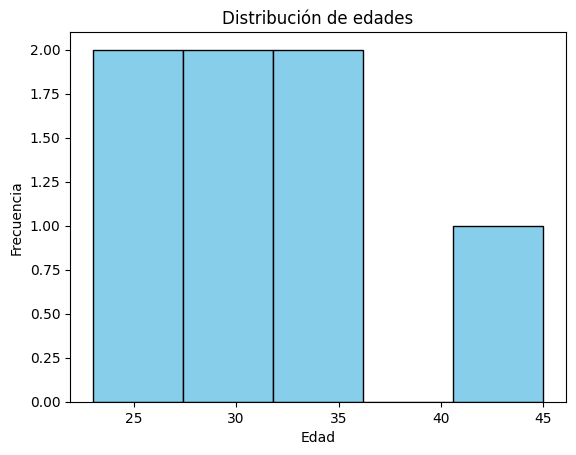

In [72]:
plt.hist(df['Edad'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

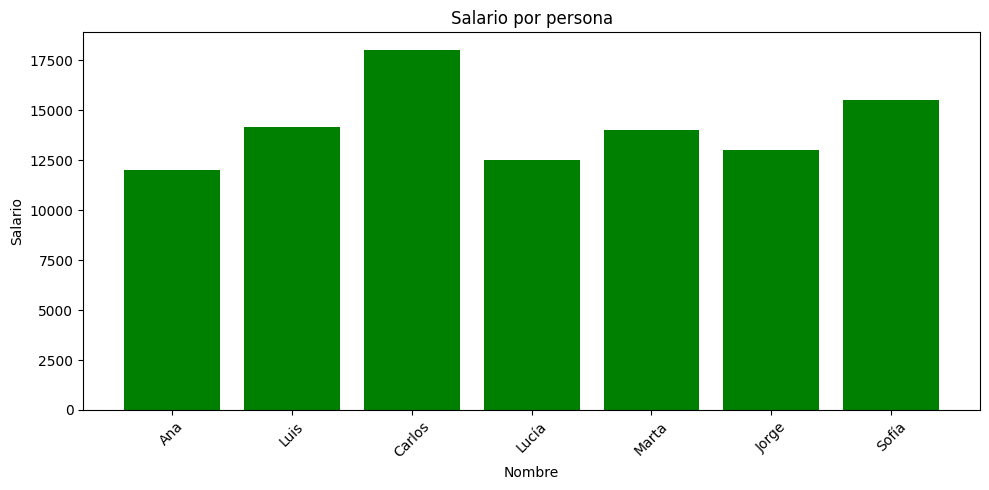

In [73]:
plt.figure(figsize=(10, 5))
plt.bar(df['Nombre'], df['Salario'], color='green')
plt.title('Salario por persona')
plt.xlabel('Nombre')
plt.ylabel('Salario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

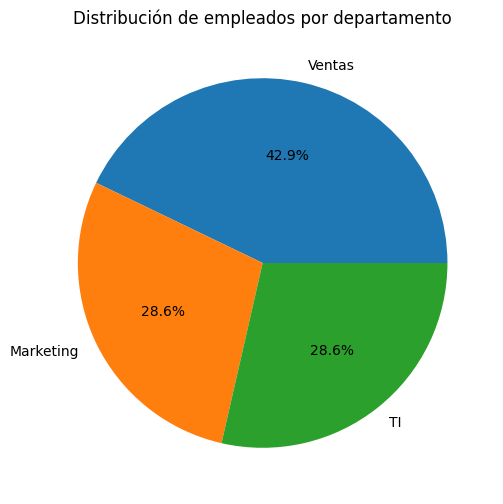

In [74]:
df['Departamento'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribución de empleados por departamento')
plt.ylabel('')
plt.show()

## 15. Uso de la función `.agg()` en Pandas

In [76]:
df.agg(['mean', 'max'])

TypeError: Could not convert string 'AnaLuisCarlosLucíaMartaJorgeSofía' to numeric

In [77]:
df.agg({
    'Edad': ['mean', 'min'],
    'Salario': ['sum', 'max']
})

,Edad,Salario
mean,31.142857,NaN
min,23.000000,NaN
sum,NaN,99166.666667
max,NaN,18000.000000


In [78]:
df.groupby('Departamento').agg({
    'Salario': ['mean', 'min', 'max'],
    'Edad': 'median'
})

Salario                          Edad
                      mean      min           max median
Departamento                                            
Marketing     13583.333333  13000.0  14166.666667   31.5
TI            13250.000000  12500.0  14000.000000   27.5
Ventas        15166.666667  12000.0  18000.000000   32.0

## 🧠 Ejercicios prácticos con `.agg()`

In [79]:
# Ejercicio 1: Promedio de edad y salario
df.agg({'Edad': 'mean', 'Salario': 'mean'})

Edad          31.142857
Salario    14166.666667
dtype: float64

In [80]:
# Ejercicio 2: Agrupa por 'Ciudad' y muestra el salario mínimo y máximo
df.groupby('Ciudad').agg({'Salario': ['min', 'max']})

Salario         
                      min      max
Ciudad                            
CDMX         12000.000000  13000.0
Guadalajara  14166.666667  15500.0
Monterrey    18000.000000  18000.0
Puebla       14000.000000  14000.0

In [81]:
# Ejercicio 3: Agrupa por 'Departamento' y calcula edad promedio, salario total y máximo
df.groupby('Departamento').agg({
    'Edad': 'mean',
    'Salario': ['sum', 'max']
})

Edad       Salario              
                   mean           sum           max
Departamento                                       
Marketing     31.500000  27166.666667  14166.666667
TI            27.500000  26500.000000  14000.000000
Ventas        33.333333  45500.000000  18000.000000

In [83]:
df_agrupado = df.groupby('Departamento')['Salario'].mean()

In [84]:
df_agrupado

Departamento
Marketing    13583.333333
TI           13250.000000
Ventas       15166.666667
Name: Salario, dtype: float64

In [89]:
df_agrupado= df_agrupado.reset_index()

In [90]:
df_agrupado

,Departamento,Salario
0,Marketing,13583.333333
1,TI,13250.000000
2,Ventas,15166.666667
